# Regression Notebook with PyGRN

In [6]:
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



# Creation of the Regression problem
def f(t, f: float = 1, k: int = 2):
    """ Fourrier decomposition of a square signal

    Args:
        t (float): time
        f(float, optional): frequency. Defaults to 1. 
        k (int, optional): degree of decomposition. Defaults to 2.

    Returns:
        values
    """
    y = np.zeros(t.shape[0])
    for i in range(0, k):

        y += np.sin((2*i + 1) * 2*np.pi*f*t)/(2*i + 1)
    
    
    y /= (4/np.pi)
    
    # transform values between 0 and 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return y

def f_lin(t):

    return t

class MyRegression(problems.base.Problem):
    def __init__(self, x_train, y_train):
        super().__init__("regression")
        self.namestr = "regression"
        self.nin = 1
        self.nout = 1

        self.x_train = x_train
        self.y_train = y_train

        
    def eval(self, grn):

        grn.setup()
        grn.warmup(10)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output() - self.y_train[i]).item() / max(self.x_train.shape)

        return 1-fit


2025-07-17 09:58:54.195 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T09:58:54.195569,0,0,10,0.093168,0.541662,3,0.140000,0.035553,3.000000
2025-07-17 09:58:54.196 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T09:58:54.196625,0,1,11,-306.023346,0.613587,3,0.140000,0.039180,3.000000
2025-07-17 09:58:54.197 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T09:58:54.197221,0,2,10,0.626605,0.719944,3,0.140000,0.043633,3.000000
2025-07-17 09:58:54.197 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T09:58:54.197772,0,3,10,-336.209254,0.779513,3,0.140000,0.059901,3.000000
2025-07-17 09:58:54.198 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T09:58:54.198258,0,4,9,-373.870787,0.671800,3,0.160000,0.027674,3.111111
2025-07-17 09:58:54.198 | INFO     | pygrn.evolution.evolution:report:74 - Generation 0: best fit 0.7795134793797853, fit mean -59.420424161232766, fit std 237.6332828989106
2025-07-17 09:58:54.245 | DE

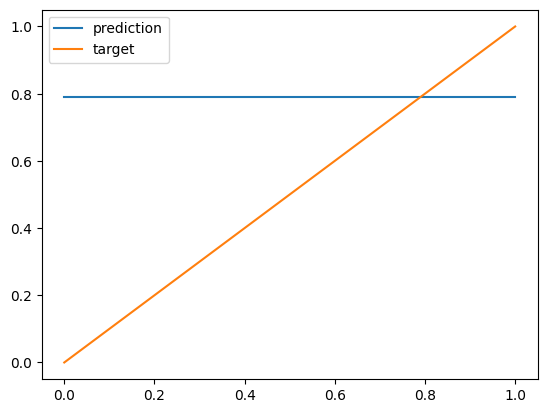

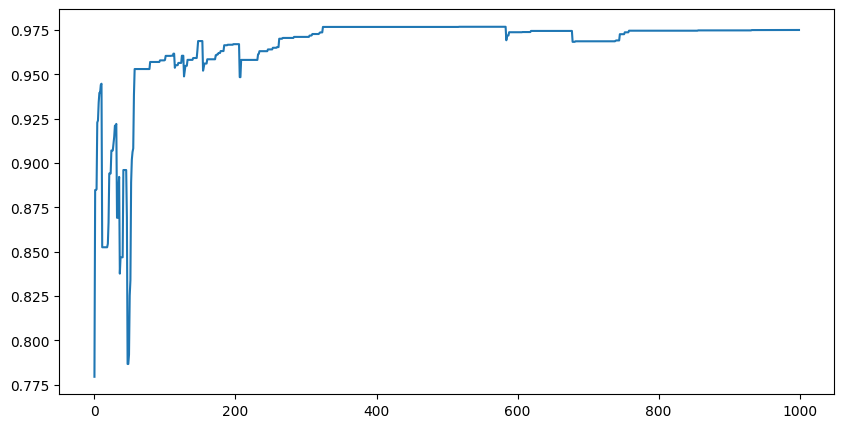

In [7]:
t = np.linspace(0, 1, 100)
y = f_lin(t)
    

grn = lambda : grns.ClassicGRN()
problem = MyRegression(t, y)


grneat = evolution.Evolution(problem, grn)
best_fit, best_ind = grneat.run(1000)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
# y_eval = f(t_eval)
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(t[i])
    best_grn.step()
    y_eval.append(best_grn.get_output())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, y, label="target")

plt.legend()
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()